In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [19]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

In [20]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [21]:
X = pima_df.drop("class", axis=1)
y = pima_df["class"]

In [22]:
X = std.fit_transform(X)

In [23]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [30]:
model = GaussianNB()

In [31]:
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [32]:
# make predictions
predicted = model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
metrics.confusion_matrix(predicted, y_test)

array([[116,  29],
       [ 31,  55]], dtype=int64)

In [39]:
model_score = model.score(X_test, y_test)
model_score

0.7402597402597403

In [36]:
y_predictProb = model.predict_proba(X_test)

In [51]:
from sklearn.metrics import auc, roc_curve

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])

In [42]:
roc_auc = auc(fpr, tpr)
roc_auc

0.7973760932944606

In [46]:
import matplotlib.pyplot as plt

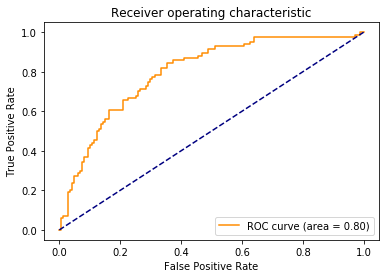

In [53]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [54]:
plt.savefig('ROC_CURVE.png')

<Figure size 432x288 with 0 Axes>